In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [524]:
#Read in the csv file and convert to a Pandas dataframe
df_2015 = pd.read_csv(r"C:\Users\mmm19\OneDrive\Desktop\Bootcamp\data\2015.csv")
df_2016 = pd.read_csv(r"C:\Users\mmm19\OneDrive\Desktop\Bootcamp\data\2016.csv")
df_2017 = pd.read_csv(r"C:\Users\mmm19\OneDrive\Desktop\Bootcamp\data\2017.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [5]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
df_2015.shape

(158, 12)

In [9]:
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [11]:
df_2016.shape

(157, 13)

In [13]:
df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [15]:
df_2017.shape

(155, 12)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [25]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [27]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [29]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [35]:
df_2015.describe(include="all")

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158,158,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
unique,158,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Switzerland,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,NaN,NaN,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,NaN,NaN,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,NaN,NaN,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,NaN,NaN,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,NaN,NaN,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415


In [37]:
df_2016.describe(include="all")

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157,157,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
unique,157,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Denmark,Sub-Saharan Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,NaN,NaN,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,NaN,NaN,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,NaN,NaN,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,NaN,NaN,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,NaN,NaN,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650


In [39]:
df_2017.describe(include="all")

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
unique,155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Norway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,NaN,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,NaN,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,NaN,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,NaN,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,NaN,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.


"The World Happiness Report is a landmark survey of the state of global happiness."
it used data from the Gallup World Poll to get happiness scores and rankings.
you can find more information on [Kaggle](https://www.kaggle.com/datasets/unsdsn/world-happiness/data) or from [here](https://worldhappiness.report/ed/2015/). 

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.


**The dataset does meet the usecase period of interest**



#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.



the dataset is consistent, there is no need to go clean the data

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


========================================================================================================

The data samples align with the usecase objective, and each column is relevant to evaluating the happiness in each country.

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [63]:
df_2015.duplicated().sum() # data has no duplicates

0

In [67]:
df_2016.duplicated().sum() # data has no duplicates

0

In [65]:
df_2017.duplicated().sum() # data has no duplicates

0

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [18]:
#Display number missing values per column
df_2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [20]:
df_2016.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [22]:
df_2017.isnull().sum() 

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [33]:
# go to clean them 
#all data types are suitable

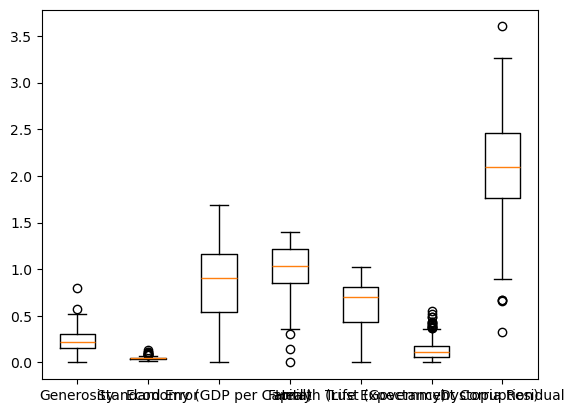

In [61]:
plt.boxplot(df_2015[["Generosity", "Standard Error", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Trust (Government Corruption)", "Dystopia Residual"]], labels= ["Generosity", "Standard Error", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Trust (Government Corruption)", "Dystopia Residual"])
plt.show()

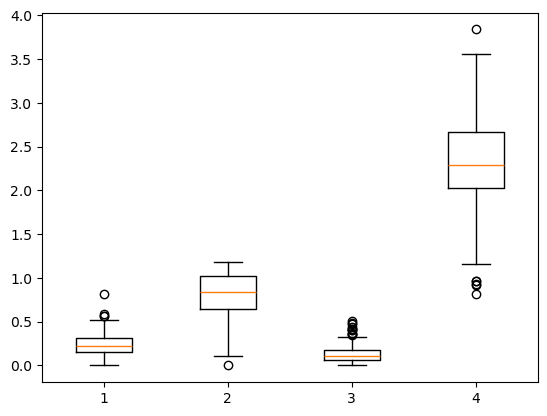

In [71]:
plt.boxplot(df_2016[["Generosity", "Family", "Trust (Government Corruption)", "Dystopia Residual"]])
plt.show()

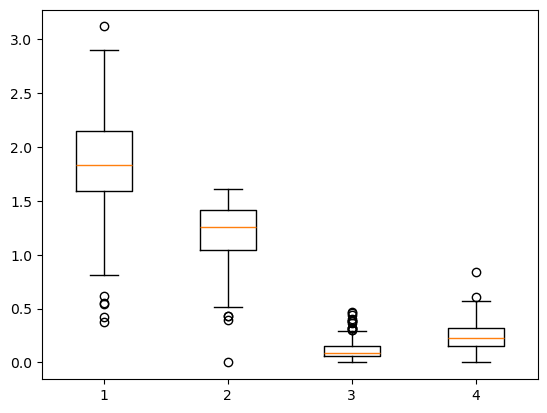

In [85]:
plt.boxplot(df_2017[["Dystopia.Residual", "Family", "Trust..Government.Corruption.", "Generosity"]])
plt.show()

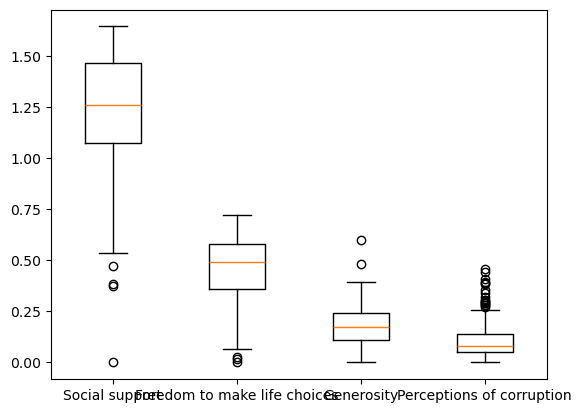

In [141]:
plt.boxplot(df_2018[labels], labels= labels)
plt.show()

In [155]:
labels.pop(0)

'GDP per capita'

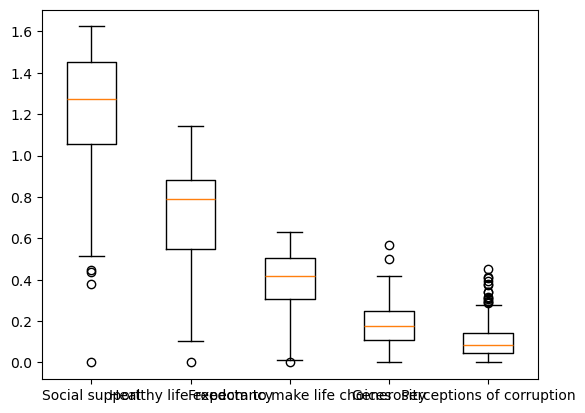

In [157]:
plt.boxplot(df_2019[labels], labels=labels)
plt.show()

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [23]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [24]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [25]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [53]:
df_2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [80]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [ ]:
# no need

In [ ]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [ ]:
# Calculate the z-score for each data point in the 'data' column
marathon_df['speed_z_score'] = zscore(marathon_df['Speed_Km/Hr'])

# Filter the DataFrame to remove outliers
marathon_df[(marathon_df['speed_z_score'] > 3) | (marathon_df['speed_z_score'] < -3)]

In [258]:
df_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

(array([ 6., 60., 57., 14., 11.,  5.,  2.,  2.,  0.,  1.]),
 array([0.01848 , 0.030325, 0.04217 , 0.054015, 0.06586 , 0.077705,
        0.08955 , 0.101395, 0.11324 , 0.125085, 0.13693 ]),
 <BarContainer object of 10 artists>)

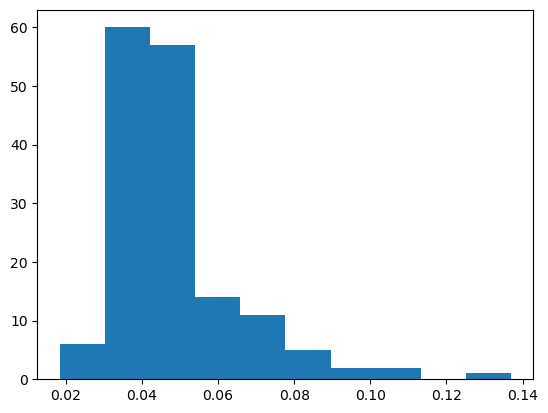

In [294]:
plt.hist(df_2015["Standard Error"])

(array([ 4., 10., 40., 36., 30., 11.,  7.,  9.,  3.,  3.]),
 array([0.01848 , 0.025374, 0.032268, 0.039162, 0.046056, 0.05295 ,
        0.059844, 0.066738, 0.073632, 0.080526, 0.08742 ]),
 <BarContainer object of 10 artists>)

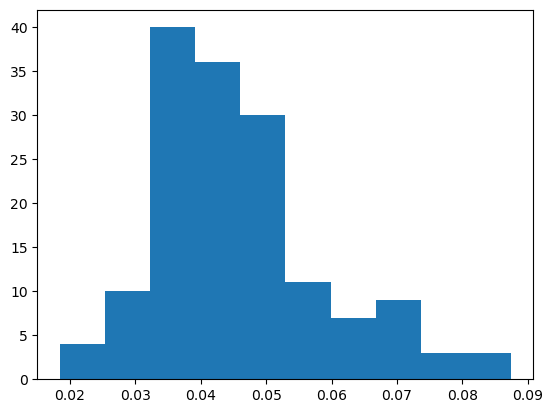

In [296]:
df_2015 = df_2015[df_2015["Standard Error"] <= 0.09]
plt.hist(df_2015["Standard Error"])

(array([12., 29., 51., 23., 19., 12.,  5.,  1.,  0.,  1.]),
 array([0.      , 0.079588, 0.159176, 0.238764, 0.318352, 0.39794 ,
        0.477528, 0.557116, 0.636704, 0.716292, 0.79588 ]),
 <BarContainer object of 10 artists>)

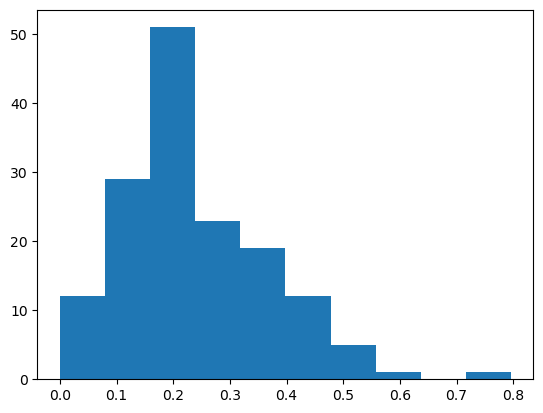

In [298]:
plt.hist(df_2015["Generosity"])

(array([ 5., 19., 24., 40., 22., 17.,  8.,  7.,  8.,  2.]),
 array([0.     , 0.05763, 0.11526, 0.17289, 0.23052, 0.28815, 0.34578,
        0.40341, 0.46104, 0.51867, 0.5763 ]),
 <BarContainer object of 10 artists>)

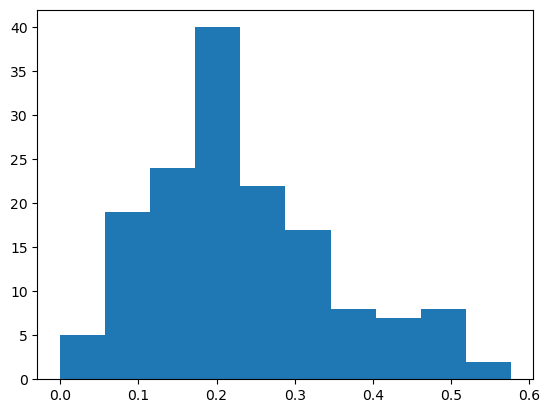

In [300]:
df_2015 = df_2015[df_2015["Generosity"] <= 0.6]
plt.hist(df_2015["Generosity"])

In [302]:
df_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

(array([14., 29., 50., 32., 12., 13.,  5.,  1.,  0.,  1.]),
 array([0.      , 0.081971, 0.163942, 0.245913, 0.327884, 0.409855,
        0.491826, 0.573797, 0.655768, 0.737739, 0.81971 ]),
 <BarContainer object of 10 artists>)

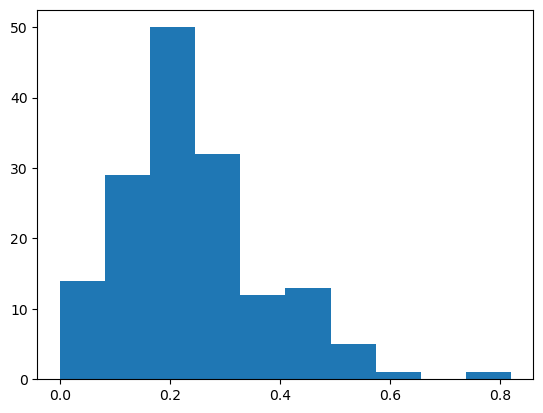

In [304]:
plt.hist(df_2016["Generosity"])

(array([ 9., 16., 26., 33., 27., 17., 10.,  5., 10.,  3.]),
 array([0.      , 0.058696, 0.117392, 0.176088, 0.234784, 0.29348 ,
        0.352176, 0.410872, 0.469568, 0.528264, 0.58696 ]),
 <BarContainer object of 10 artists>)

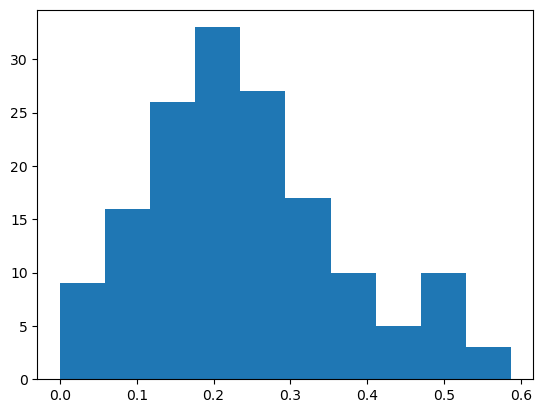

In [306]:
df_2016 = df_2016[df_2016["Generosity"] <= 0.6]
plt.hist(df_2016["Generosity"])

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [107]:
region_count_2015 = df_2015["Region"].value_counts()

In [105]:
region_count_2016 = df_2016["Region"].value_counts()

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

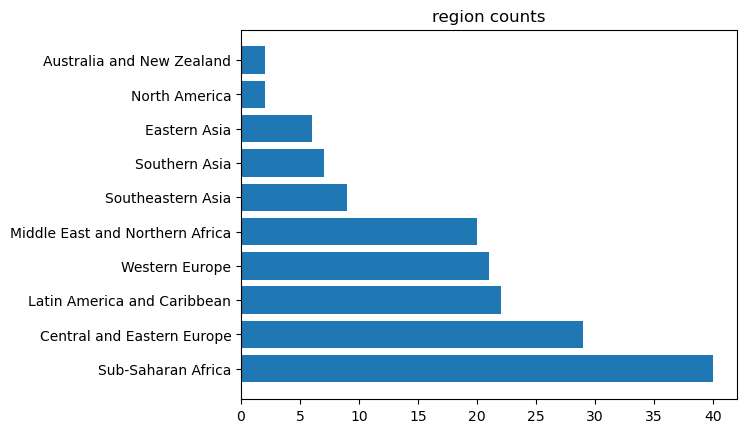

<Figure size 1600x1200 with 0 Axes>

In [119]:
plt.barh(
    region_count_2015.index,
    region_count_2015.values
)
plt.title("region counts")
plt.figure(figsize=(16,12))
plt.show()

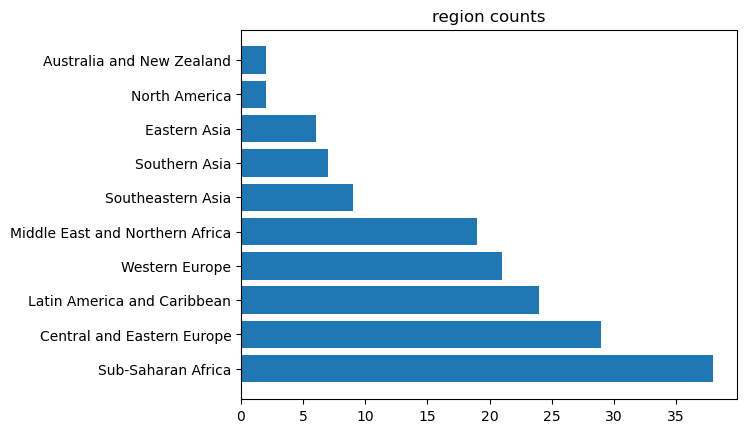

<Figure size 1600x1200 with 0 Axes>

In [117]:
plt.barh(
    region_count_2016.index,
    region_count_2016.values
)
plt.title("region counts")
plt.figure(figsize=(16,12))
plt.show()

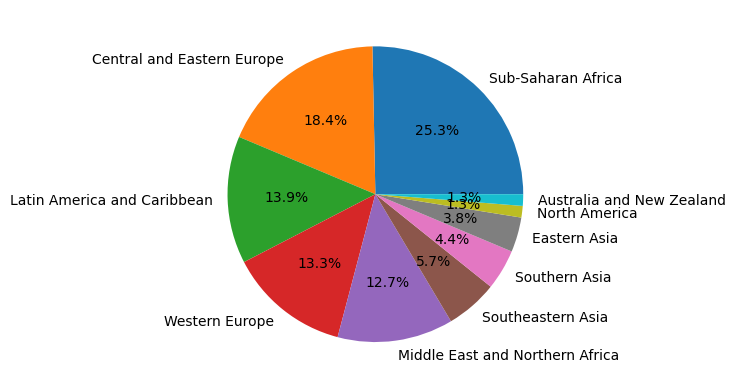

In [103]:
plt.pie(region_count_2015.values,
        labels=region_count_2015.index,
        autopct='%1.1f%%'
       )
plt.show()

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

In [127]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


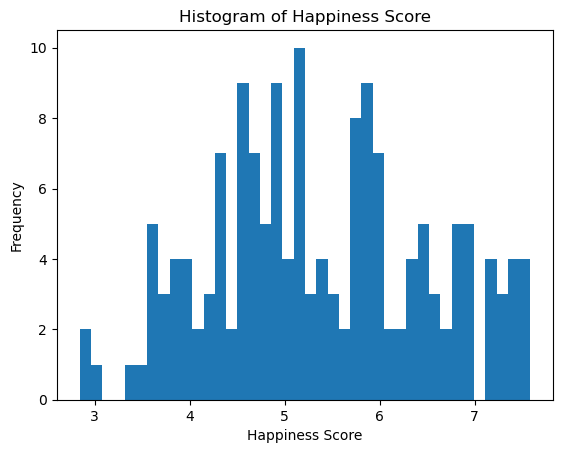

In [125]:
plt.hist(df_2015['Happiness Score'],
         bins = 40
        ) # bins = 6 means 6 bars
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title(f'Histogram of Happiness Score')
plt.show()

In [143]:
df_2018.head(1)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393


Text(0.5, 1.0, 'Histogram for 2018')

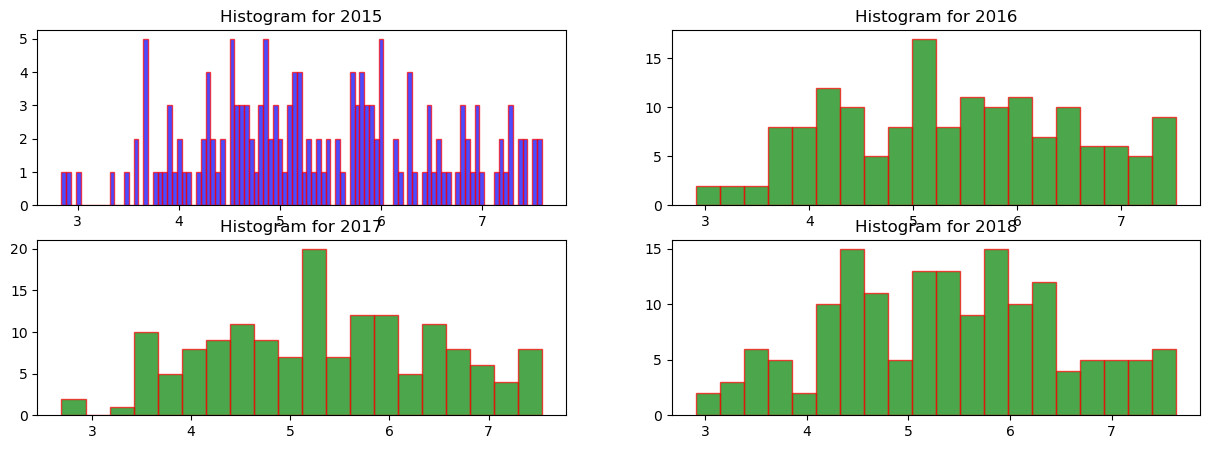

In [147]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))

axes[0][0].hist(df_2015['Happiness Score'],edgecolor = 'red', bins=100, alpha=0.7, color='blue')
axes[0][0].set_title('Histogram for 2015')


axes[0][1].hist(df_2016['Happiness Score'], edgecolor = 'red', bins=20, alpha=0.7, color='green')
axes[0][1].set_title('Histogram for 2016')


axes[1][0].hist(df_2017['Happiness.Score'], edgecolor = 'red', bins=20, alpha=0.7, color='green')
axes[1][0].set_title('Histogram for 2017')


axes[1][1].hist(df_2018['Score'], edgecolor = 'red', bins=20, alpha=0.7, color='green')
axes[1][1].set_title('Histogram for 2018')

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [153]:
df_2015.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


In [157]:
df_2016.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,157.0,78.980892,45.466030,1.00000,40.00000,79.00000,118.00000,157.00000
Happiness Score,157.0,5.382185,1.141674,2.90500,4.40400,5.31400,6.26900,7.52600
Lower Confidence Interval,157.0,5.282395,1.148043,2.73200,4.32700,5.23700,6.15400,7.46000
Upper Confidence Interval,157.0,5.481975,1.136493,3.07800,4.46500,5.41900,6.43400,7.66900
Economy (GDP per Capita),157.0,0.953880,0.412595,0.00000,0.67024,1.02780,1.27964,1.82427
Family,157.0,0.793621,0.266706,0.00000,0.64184,0.84142,1.02152,1.18326
Health (Life Expectancy),157.0,0.557619,0.229349,0.00000,0.38291,0.59659,0.72993,0.95277
Freedom,157.0,0.370994,0.145507,0.00000,0.25748,0.39747,0.48453,0.60848
Trust (Government Corruption),157.0,0.137624,0.111038,0.00000,0.06126,0.10547,0.17554,0.50521
Generosity,157.0,0.242635,0.133756,0.00000,0.15457,0.22245,0.31185,0.81971


In [159]:
df_2017.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness.Rank,155.0,78.000000,44.888751,1.000000,39.500000,78.000000,116.500000,155.000000
Happiness.Score,155.0,5.354019,1.131230,2.693000,4.505500,5.279000,6.101500,7.537000
Whisker.high,155.0,5.452326,1.118542,2.864884,4.608172,5.370032,6.194600,7.622030
Whisker.low,155.0,5.255713,1.145030,2.521116,4.374955,5.193152,6.006527,7.479556
Economy..GDP.per.Capita.,155.0,0.984718,0.420793,0.000000,0.663371,1.064578,1.318027,1.870766
Family,155.0,1.188898,0.287263,0.000000,1.042635,1.253918,1.414316,1.610574
Health..Life.Expectancy.,155.0,0.551341,0.237073,0.000000,0.369866,0.606042,0.723008,0.949492
Freedom,155.0,0.408786,0.149997,0.000000,0.303677,0.437454,0.516561,0.658249
Generosity,155.0,0.246883,0.134780,0.000000,0.154106,0.231538,0.323762,0.838075
Trust..Government.Corruption.,155.0,0.123120,0.101661,0.000000,0.057271,0.089848,0.153296,0.464308


## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

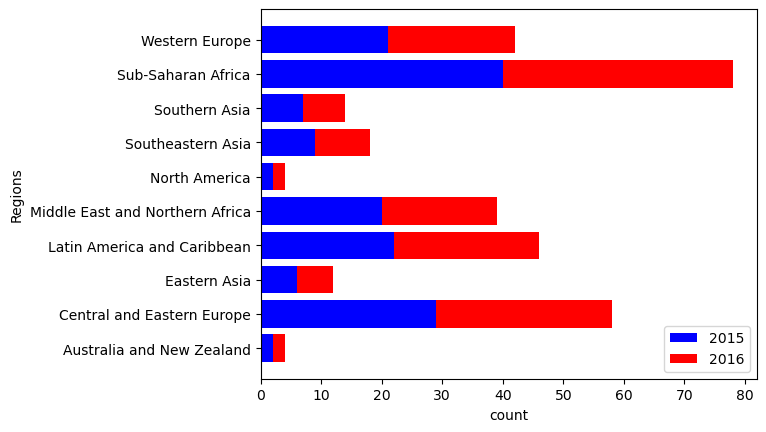

In [228]:
plt.barh(region_counts_2015.index, region_counts_2015.values, label='2015', color='b')
plt.barh(region_counts_2015.index, region_counts_2016.values, left=region_counts_2015.values, label='2016', color='r')

plt.xlabel('count')
plt.ylabel('Regions')
plt.legend()

plt.show()

**Categorical & numerical --> (scatter plot, histogram, box plot)**

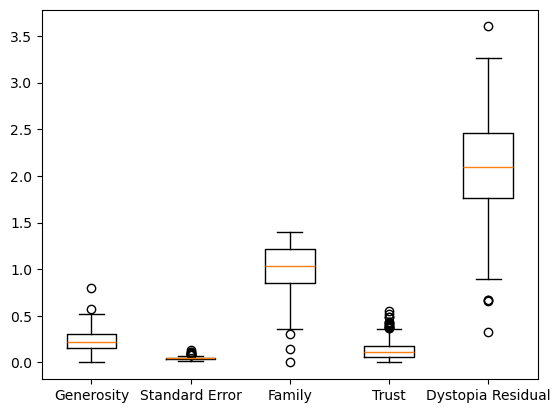

In [248]:
plt.boxplot(df_2015[["Generosity", "Standard Error", "Family", "Trust (Government Corruption)", "Dystopia Residual"]], labels= ["Generosity", "Standard Error", "Family", "Trust", "Dystopia Residual"])
plt.show()

In [250]:
df_2015.sample()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
22,Venezuela,Latin America and Caribbean,23,6.81,0.06476,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,3.19131


**numerical & numerical --> (Scatter plot, line chart)**

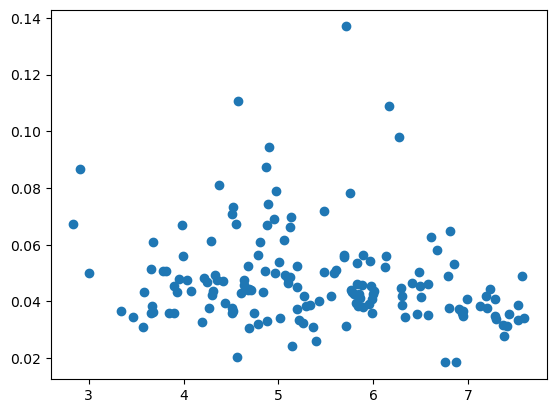

In [252]:
plt.scatter(df_2015["Happiness Score"], df_2015["Standard Error"])

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

# Q1
What countries or regions rank the highest in overall happiness and each of
 the six factors contributing to happiness? 

In [371]:
df_2015.sample()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
141,Senegal,Sub-Saharan Africa,142,3.904,0.03608,0.36498,0.97619,0.4354,0.36772,0.10713,0.20843,1.44395


In [375]:
 for column in df_2015.columns[2:]:
        df_2015 = df_2015.sort_values(by=column, ascending=True)
        print(f"After sorting by '{column}', the first Country is: {df_2015.loc[df_2015.index[0]][0]}")

After sorting by 'Happiness Rank', the first Country is: Switzerland
After sorting by 'Happiness Score', the first Country is: Togo
After sorting by 'Standard Error', the first Country is: Germany
After sorting by 'Economy (GDP per Capita)', the first Country is: Congo (Kinshasa)
After sorting by 'Family', the first Country is: Central African Republic
After sorting by 'Health (Life Expectancy)', the first Country is: Sierra Leone
After sorting by 'Freedom', the first Country is: Iraq
After sorting by 'Trust (Government Corruption)', the first Country is: Indonesia
After sorting by 'Generosity', the first Country is: Greece
After sorting by 'Dystopia Residual', the first Country is: Syria


C:\Users\mmm19\AppData\Local\Temp\ipykernel_27696\164944788.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [353]:
df_2016.sample()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
138,Ivory Coast,Sub-Saharan Africa,139,3.916,3.826,4.006,0.55507,0.57576,0.04476,0.40663,0.1553,0.20338,1.97478


In [355]:
 for column in df_2016.columns[2:]:
        df_2016 = df_2016.sort_values(by=column, ascending=True)
        print(f"After sorting by '{column}', the first Country is: {df_2016.loc[df_2016.index[0]][0]}")

After sorting by 'Happiness Rank', the first Country is: Denmark
After sorting by 'Happiness Score', the first Country is: Burundi
After sorting by 'Lower Confidence Interval', the first Country is: Burundi
After sorting by 'Upper Confidence Interval', the first Country is: Burundi
After sorting by 'Economy (GDP per Capita)', the first Country is: Somalia
After sorting by 'Family', the first Country is: Togo
After sorting by 'Health (Life Expectancy)', the first Country is: Sierra Leone
After sorting by 'Freedom', the first Country is: Sudan
After sorting by 'Trust (Government Corruption)', the first Country is: Bosnia and Herzegovina
After sorting by 'Generosity', the first Country is: Greece
After sorting by 'Dystopia Residual', the first Country is: Syria


C:\Users\mmm19\AppData\Local\Temp\ipykernel_27696\2053857459.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [351]:
df_2017.head(1)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
141,Botswana,142,3.766,3.874123,3.657877,1.122094,1.221555,0.341756,0.505196,0.099348,0.098583,0.377914


In [349]:
 for column in df_2017.columns[1:]:
        df_2017 = df_2017.sort_values(by=column, ascending=True)
        print(f"After sorting by '{column}', the first Country is: {df_2017.loc[df_2017.index[0]][0]}")

After sorting by 'Happiness.Rank', the first Country is: Norway
After sorting by 'Happiness.Score', the first Country is: Central African Republic
After sorting by 'Whisker.high', the first Country is: Central African Republic
After sorting by 'Whisker.low', the first Country is: Central African Republic
After sorting by 'Economy..GDP.per.Capita.', the first Country is: Central African Republic
After sorting by 'Family', the first Country is: Central African Republic
After sorting by 'Health..Life.Expectancy.', the first Country is: Lesotho
After sorting by 'Freedom', the first Country is: Angola
After sorting by 'Generosity', the first Country is: Greece
After sorting by 'Trust..Government.Corruption.', the first Country is: Bosnia and Herzegovina
After sorting by 'Dystopia.Residual', the first Country is: Botswana


C:\Users\mmm19\AppData\Local\Temp\ipykernel_27696\3408122426.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [357]:
df_2018.sample()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
57,58,Northern Cyprus,5.835,1.229,1.211,0.909,0.495,0.179,0.154


In [369]:
 for column in df_2018.columns[2:]:
        df_2018 = df_2018.sort_values(by=column, ascending=True)
        print(f"After sorting by '{column}', the first Country is: {df_2018.loc[df_2018.index[1]][1]}")

After sorting by 'Score', the first Country is: Central African Republic
After sorting by 'GDP per capita', the first Country is: Central African Republic
After sorting by 'Social support', the first Country is: Benin
After sorting by 'Healthy life expectancy', the first Country is: Central African Republic
After sorting by 'Freedom to make life choices', the first Country is: Sudan
After sorting by 'Generosity', the first Country is: Morocco
After sorting by 'Perceptions of corruption', the first Country is: Bosnia and Herzegovina


C:\Users\mmm19\AppData\Local\Temp\ipykernel_27696\4127565342.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [363]:
df_2019.sample()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
108,109,Cambodia,4.7,0.574,1.122,0.637,0.609,0.232,0.062


In [367]:
 for column in df_2019.columns[2:]:
        df_2019 = df_2019.sort_values(by=column, ascending=True)
        print(f"After sorting by '{column}', the first Country is: {df_2019.loc[df_2019.index[1]][1]}")

After sorting by 'Score', the first Country is: Central African Republic
After sorting by 'GDP per capita', the first Country is: Central African Republic
After sorting by 'Social support', the first Country is: Syria
After sorting by 'Healthy life expectancy', the first Country is: Central African Republic
After sorting by 'Freedom to make life choices', the first Country is: South Sudan
After sorting by 'Generosity', the first Country is: Botswana
After sorting by 'Perceptions of corruption', the first Country is: Bulgaria


C:\Users\mmm19\AppData\Local\Temp\ipykernel_27696\1558947312.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



# Q2
How did country ranks or scores change between the 2015 and 2016 as well as  the 2016 and 2017 reports? 

In [395]:
df_2015.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [389]:
df_2016.head(10)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [484]:
merged_df = df_2015.merge(df_2016, on='Country', suffixes=('_2015', '_2016'))
merged_df

,Country,Region_2015,Happiness Rank_2015,Happiness Score_2015,Standard Error,Economy (GDP per Capita)_2015,Family_2015,Health (Life Expectancy)_2015,Freedom_2015,Trust (Government Corruption)_2015,...,Happiness Score_2016,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita)_2016,Family_2016,Health (Life Expectancy)_2016,Freedom_2016,Trust (Government Corruption)_2016,Generosity_2016,Dystopia Residual_2016
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,...,3.515,3.444,3.586,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819
142,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,...,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
143,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,...,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
144,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,...,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


In [486]:
merged_df["Rank Change"] = merged_df["Happiness Rank_2015"] - merged_df["Happiness Rank_2016"]
merged_df["Rank Change"]

0     -1
1     -1
2      2
3      0
4     -1
      ..
141    2
142    2
143    0
144    0
145    3
Name: Rank Change, Length: 146, dtype: int64

In [488]:
merged_df["Score Change"] = merged_df["Happiness Score_2015"] - merged_df["Happiness Score_2016"]
merged_df["Score Change"]

0      0.078
1      0.060
2      0.001
3      0.024
4      0.023
       ...  
141   -0.050
142   -0.144
143   -0.063
144    0.000
145   -0.464
Name: Score Change, Length: 146, dtype: float64

Text(0.5, 1.0, 'The change of scores on 2015-2016 period')

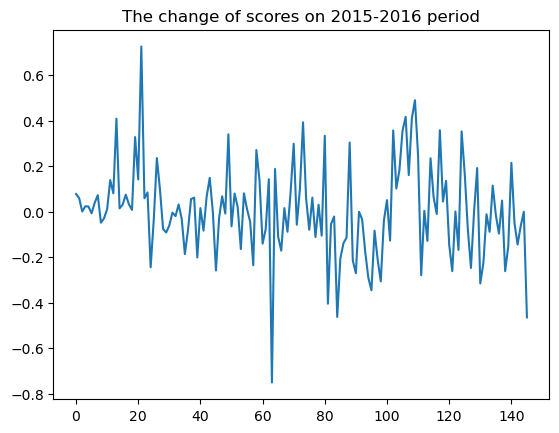

In [518]:
plt.plot(merged_df["Score Change"])
plt.title("The change of scores on 2015-2016 period")

Text(0.5, 1.0, 'The change of Ranks on 2015-2016 period')

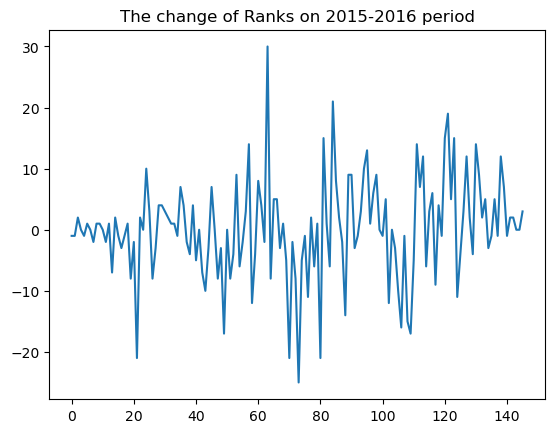

In [514]:
plt.plot(merged_df["Rank Change"])
plt.title("The change of Ranks on 2015-2016 period")

In [516]:
merged_df2 = df_2016.merge(df_2017, on='Country', suffixes=('_2015', '_2016'))
merged_df2

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family_2015,Health (Life Expectancy),Freedom_2015,...,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family_2016,Health..Life.Expectancy.,Freedom_2016,Generosity_2016,Trust..Government.Corruption.,Dystopia.Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,...,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,...,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,...,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,...,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,...,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,...,3.657,3.745784,3.568217,0.431085,0.435300,0.209930,0.425963,0.207948,0.060929,1.885631
145,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,...,3.794,3.873661,3.714338,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801
146,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,...,3.495,3.594038,3.395962,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229
147,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,...,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574


In [504]:
df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [498]:
merged_df2["Rank Change"] = merged_df2["Happiness Rank"] - merged_df2["Happiness.Rank"]
merged_df2["Rank Change"]

0      -1
1      -2
2       0
3       3
4       0
       ..
144    10
145    13
146     5
147     4
148     3
Name: Rank Change, Length: 149, dtype: int64

In [500]:
merged_df2["Score Change"] = merged_df2["Happiness Score"] - merged_df2["Happiness.Score"]
merged_df2["Score Change"]

0      4.000164e-03
1      1.500004e-02
2     -3.000187e-03
3     -3.900018e-02
4     -5.599986e-02
           ...     
144   -1.730001e-01
145   -4.339999e-01
146   -1.919999e-01
147   -3.929999e-01
148    2.861023e-08
Name: Score Change, Length: 149, dtype: float64

Text(0.5, 1.0, 'The change of Ranks on 2016-2017 period')

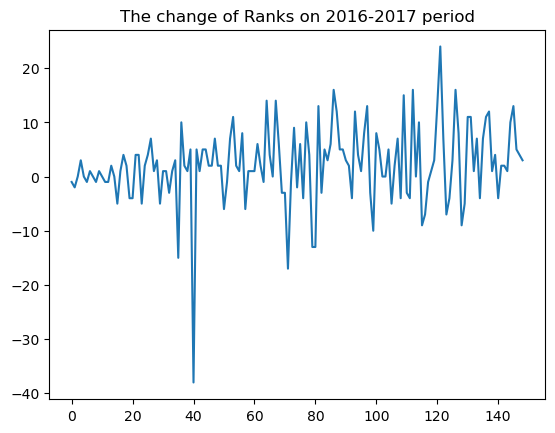

In [512]:
plt.plot(merged_df2["Rank Change"])
plt.title("The change of Ranks on 2016-2017 period")

Text(0.5, 1.0, 'The change of scores on 2016-2017 period')

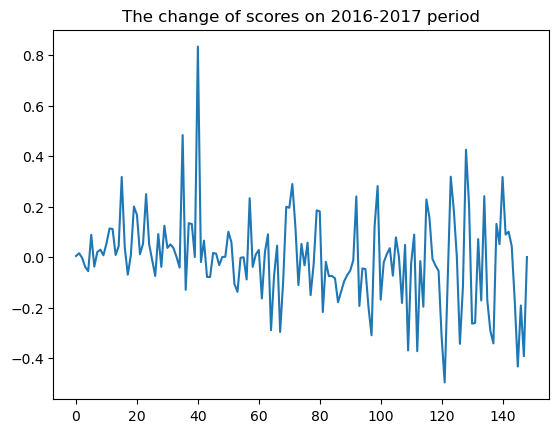

In [510]:
plt.plot(merged_df2["Score Change"])
plt.title("The change of scores on 2016-2017 period")

# Q3
 Did any country experience a significant increase or decrease in happiness?

In [520]:
# most change on rank
merged_df.sort_values("Rank Change").head()

,Country,Region_2015,Happiness Rank_2015,Happiness Score_2015,Standard Error,Economy (GDP per Capita)_2015,Family_2015,Health (Life Expectancy)_2015,Freedom_2015,Trust (Government Corruption)_2015,...,Upper Confidence Interval,Economy (GDP per Capita)_2016,Family_2016,Health (Life Expectancy)_2016,Freedom_2016,Trust (Government Corruption)_2016,Generosity_2016,Dystopia Residual_2016,Rank Change,Score Change
73,Nigeria,Sub-Saharan Africa,78,5.268,0.04192,0.65435,0.90432,0.16007,0.34334,0.04030,...,5.000,0.75216,0.64498,0.05108,0.27854,0.03050,0.23219,2.88586,-25,0.393
70,Vietnam,Southeastern Asia,75,5.360,0.03107,0.63216,0.91226,0.74676,0.59444,0.10441,...,5.131,0.74037,0.79117,0.66157,0.55954,0.11556,0.25075,1.94180,-21,0.299
80,Zambia,Sub-Saharan Africa,85,5.129,0.06988,0.47038,0.91612,0.29924,0.48827,0.12468,...,4.945,0.61202,0.63760,0.23573,0.42662,0.11479,0.17866,2.58991,-21,0.334
21,Venezuela,Latin America and Caribbean,23,6.810,0.06476,1.04424,1.25596,0.72052,0.42908,0.11069,...,6.195,1.13367,1.03302,0.61904,0.19847,0.08304,0.04250,2.97468,-21,0.726
49,Paraguay,Latin America and Caribbean,53,5.878,0.04563,0.75985,1.30477,0.66098,0.53899,0.08242,...,5.623,0.89373,1.11111,0.58295,0.46235,0.07396,0.25296,2.16091,-17,0.340


In [522]:
# most change on Score
merged_df.sort_values("Score Change").head()

,Country,Region_2015,Happiness Rank_2015,Happiness Score_2015,Standard Error,Economy (GDP per Capita)_2015,Family_2015,Health (Life Expectancy)_2015,Freedom_2015,Trust (Government Corruption)_2015,...,Upper Confidence Interval,Economy (GDP per Capita)_2016,Family_2016,Health (Life Expectancy)_2016,Freedom_2016,Trust (Government Corruption)_2016,Generosity_2016,Dystopia Residual_2016,Rank Change,Score Change
63,Algeria,Middle East and Northern Africa,68,5.605,0.05099,0.93929,1.07772,0.61766,0.28579,0.17383,...,6.483,1.05266,0.83309,0.61804,0.21006,0.16157,0.07044,3.40904,30,-0.750
145,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,...,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,3,-0.464
84,Latvia,Central and Eastern Europe,89,5.098,0.04640,1.11312,1.09562,0.72437,0.29671,0.06332,...,5.634,1.21788,0.95025,0.63952,0.27996,0.08890,0.17445,2.20859,21,-0.462
81,Romania,Central and Eastern Europe,86,5.124,0.06607,1.04345,0.88588,0.76890,0.35068,0.00649,...,5.629,1.16970,0.72803,0.67602,0.36712,0.00679,0.12889,2.45184,15,-0.404
95,Hungary,Central and Eastern Europe,104,4.800,0.06107,1.12094,1.20215,0.75905,0.32112,0.02758,...,5.234,1.24142,0.93164,0.67608,0.19770,0.04472,0.09900,1.95473,13,-0.345
